# Penguin Species Classficiation
By Eric Chi

# Data Import & Cleaning

In [ ]:
import pandas as pd
%config inlineBackend.figure_format = 'retina'
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

In [ ]:
penguins["Species"] = penguins["Species"].str.split().str.get(0)

In [ ]:
from sklearn.model_selection import train_test_split

X = penguins.drop(["Species"], axis = 1)
y = penguins["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

We split our data into our X and y variables. The "Species" column was the variable we wanted to predict so we assigned this to y and every other column was assigned to X. Using the train_test_split module from sklearn, we then split these into training and testing sets with 30% of the data being testing data. We assigned a random state to ensure consistent reproducibility between different tests.

In [ ]:
from sklearn import preprocessing

def clean_data(df_data):

    """
    Cleans tha data by dropping columns and encoding labels for the non integer variables
    Returns the cleaned dataframe and indices of the penguins with NaN values
    """

    df = df_data.copy()
    df = df.drop(["studyName", "Stage", "Individual ID", "Clutch Completion", "Date Egg", "Comments", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"], axis = 1)
    nan_indices = df[df['Sex'].isna()].index
    df = df.dropna(subset=['Sex'])

    le = preprocessing.LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Region"] = le.fit_transform(df["Region"])
    df["Island"] = le.fit_transform(df["Island"])

    return df, nan_indices

X_train, train_nan_indices = clean_data(X_train)
X_test, test_nan_indices = clean_data(X_test)


y_train = y_train.drop(train_nan_indices)
y_test = y_test.drop(test_nan_indices)

We then cleaned our data with a function.

This function dropped the columns ["studyName", "Stage", "Individual ID", "Clutch Completion", "Date Egg", "Comments", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"] because we did not see these being useful to predict the species of the penguins and this made testing different feature combinations more efficient. The first six columns we dropped because they were specific to the individual penguin and were not dependent on their species in any ways. The last two columns we dropped because we saw that there was not a significant difference in these for each of the three species when compared to the others.

The function then also dropped the penguins with NaN values and then used a label encoder to change the ["Sex", "Region", "Island"] columns to have int values instead of strings in order to be able to use them with the machine learning models.

# Exploratory Analysis



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

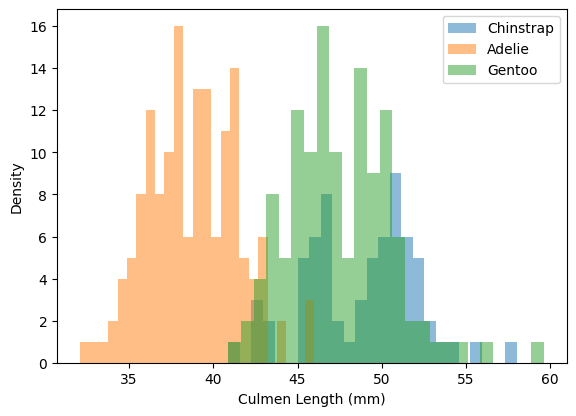

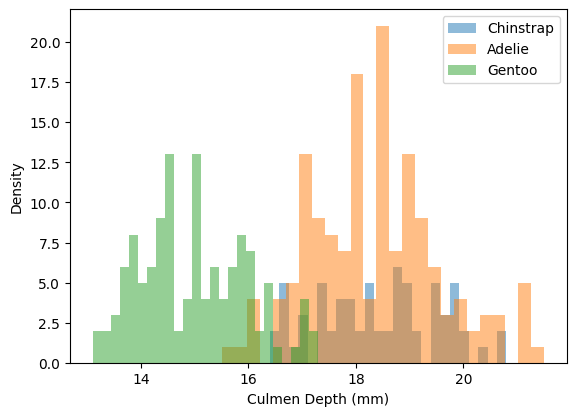

In [ ]:

fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Density")

species = set(penguins["Species"])  # Adelie, Chinstrap, Gentoo

for s in species:
    subspecies = penguins[penguins["Species"] == s]
    name = s.split(" ")
    ax.hist(subspecies['Culmen Length (mm)'], label = name[0], alpha = 0.5, bins = 25)

plt.tight_layout(pad=3.0)  # Adjust the padding to add space between the plots
ax.legend();

fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Depth (mm)",
       ylabel = "Density")

species = set(penguins["Species"])  # Adelie, Chinstrap, Gentoo

for s in species:
    subspecies = penguins[penguins["Species"] == s]
    name = s.split(" ")
    ax.hist(subspecies['Culmen Depth (mm)'], label = name[0], alpha = 0.5, bins = 25)

plt.tight_layout(pad=3.0)  # Adjust the padding to add space between the plots
ax.legend();


Using the data, I plotted two different attributes against density for the different species of penguins. In the first graph, the culmen length is plotted agsinst density, with different colors representing the different species. From this, we can see that adelie penguins tend to have the smallest culmen length, and chinstrap and gentoo penguins have larger culmen lengths. In the second graph, I plotted the culmen depth against density, with different colors representing the different species. We can see that gentoo penugins tend to have smaller culmen depths, while adelie and chinstrap penguins have larger culmen depths. These graphs show us what attributes each species of penguin tends to have and can be useful in our models when predicting the penguins' species.

In [ ]:
def penguin_summary_table(group_cols, value_cols):

    summary_table = penguins.groupby(group_cols)[value_cols].mean()

    summary_table = summary_table.round(2)

    return summary_table

t1 = penguin_summary_table(["Species", "Sex"], ["Culmen Length (mm)", "Body Mass (g)"])

t1 = t1.drop(t1[t1.index.get_level_values('Sex') == "."].index)

t1

Culmen Length (mm)  Body Mass (g)
Species   Sex                                      
Adelie    FEMALE               37.26        3368.84
          MALE                 40.39        4043.49
Chinstrap FEMALE               46.57        3527.21
          MALE                 51.09        3938.97
Gentoo    FEMALE               45.56        4679.74
          MALE                 49.47        5484.84

This summary table shows the mean culmen length and body mass for each of the three species separated by sex within each species. When looking at this, we can see that both the culmen length and body mass means are quite different between females and males for all three species with the male penguins being larger across the board. We can also see that more broadly the three species themselves also have different stats compared to each other.

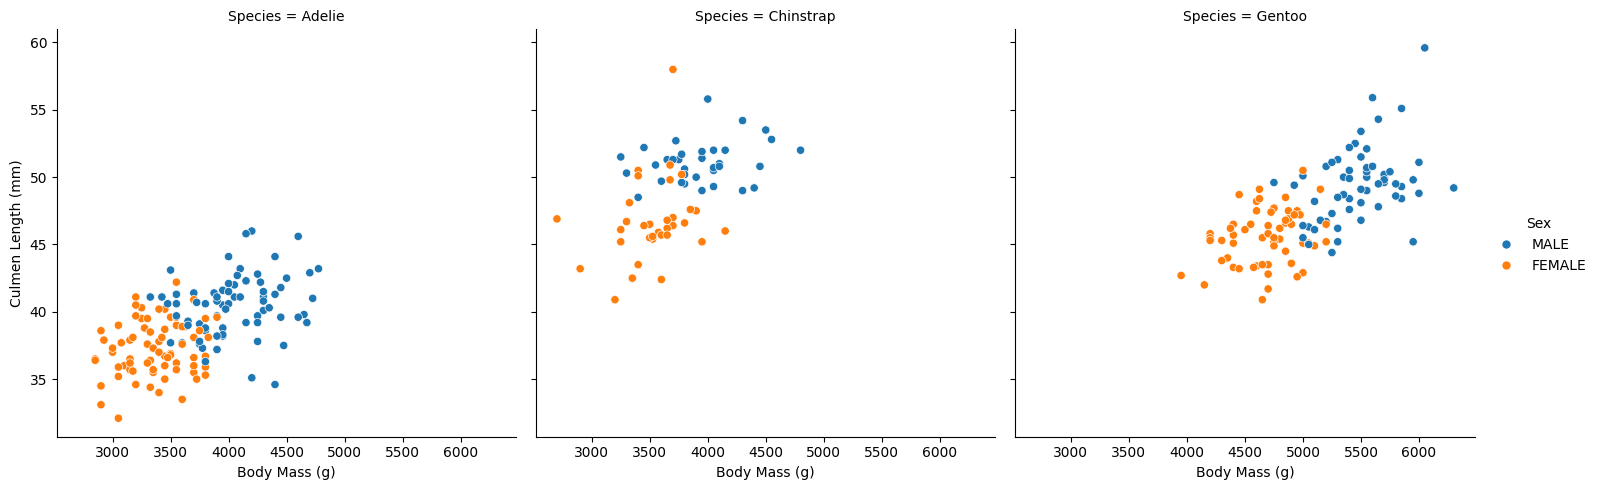

In [ ]:
penguins = penguins[penguins["Sex"] != "."]

figure = sns.relplot(
                      data = penguins,
                      x = "Body Mass (g)",
                      y = "Culmen Length (mm)",
                      hue = "Sex",
                      col = "Species",
                      kind = "scatter",
                      height = 5,
                      aspect = 1,
)

plt.show()

This figure shows the data represented by the summary table above plotted on a scatterplot for a more visual look at the differences seen in the penguins. When looking within each plot, one can once again see the difference between male and female penguins with males having larger body masses and culmen lengths on average. When comparing the three species, one can see that the Adelie appear to have a smaller body mass and shorter culmens while the Chinstrap have similar body masses but significanty longer culmens. The Gentoo seem to be larger in body mass than the other two but have similar culmen lenghts to the Chinstrap (which is higher than that of the Adelie). This goes to show that both culmen length and body mass can be useful when trying to determine the species of a penguin given only it's measurements.

<Axes: xlabel='Species', ylabel='Culmen Depth (mm)'>

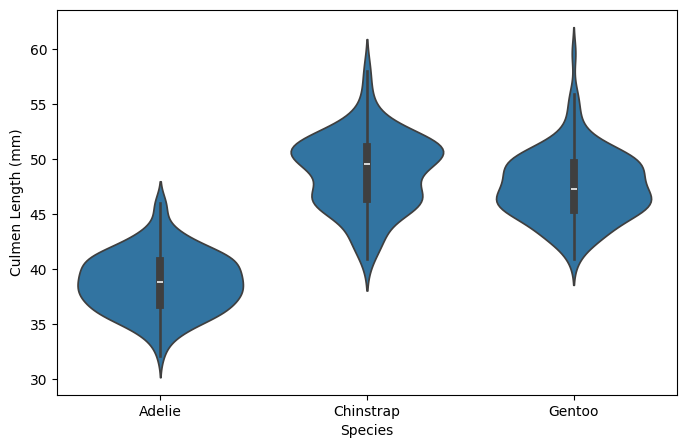

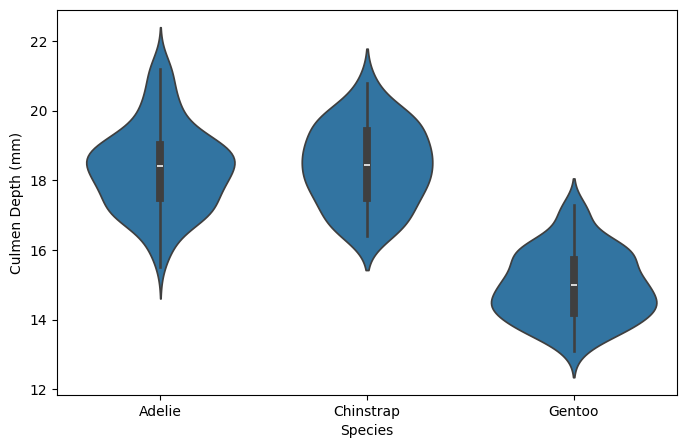

In [ ]:
# Creating two violin plots with our features.
plt1=plt.figure(figsize=(8, 5))
sns.violinplot(x='Species', y='Culmen Length (mm)', data=penguins);

plt2=plt.figure(figsize = (8,5))
sns.violinplot (x = 'Species', y = 'Culmen Depth (mm)', data = penguins)


The violin plot figure shows the distribution of values of Culmen Length and Culmen depth between the three species. From this graph we see that between the species Gentoo and Chinstrap, their Culmen Length does not differ very drastically. Contrastingly when we look at the distribution of Culmen Depth between Adelie and Chinstrap is very similar while the Gentoo species is the outlier. This shows that when we look at both figures for all three, we can use these values to train our machine learning models to accurately predict the species of the penguins.

# Feature Selection

In [ ]:
import itertools
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# function for checking the best combinations of 3 features

def check_col_score(cols, model):
    """
    Trains and evaluates a given model via cross validation on the cols features
    Returns the CV mean score
    """

    #get cross validation score for our chosen model

    score = cross_val_score(model, X_train[list(cols)], y_train, cv = 5).mean()

    if score > 0.97:
      print("Training with columns " + str(cols))
      return score

In [ ]:
 # feature selection for logistic regression - Jennifer

cols = ["Region", "Island", "Culmen Length (mm)",	"Culmen Depth (mm)",	"Flipper Length (mm)",	"Body Mass (g)",	"Sex"]
combos = itertools.combinations(cols, 3)

LR = LogisticRegression(multi_class= "multinomial", solver = "lbfgs", max_iter = 1000)

for cols in combos:
    x = check_col_score(cols, LR)
    if x != None:
      print("CV score is " + str(x))

Training with columns ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)')
CV score is 0.9786308973172989
Training with columns ('Island', 'Culmen Length (mm)', 'Body Mass (g)')
CV score is 0.9742830712303423
Training with columns ('Island', 'Culmen Length (mm)', 'Sex')
CV score is 0.9785383903792784
Training with columns ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)')
CV score is 0.9827937095282145
Training with columns ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)')
CV score is 0.9913043478260869
Training with columns ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex')
CV score is 0.9785383903792784
Training with columns ('Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)')
CV score is 0.9700277520814062
Training with columns ('Culmen Length (mm)', 'Body Mass (g)', 'Sex')
CV score is 0.9785383903792784


Best Features for Logistic Regression (1 qualitative and 2 quantitative features):

- ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)')

>  CV score is 0.9786308973172989

In [ ]:
 # feature selection for random forest - Manvitha

cols = ["Region", "Island", "Culmen Length (mm)",	"Culmen Depth (mm)",	"Flipper Length (mm)",	"Body Mass (g)",	"Sex"]
combos = itertools.combinations(cols, 3)

RF = RandomForestClassifier(random_state = 2004)

for cols in combos:
  x = check_col_score(cols, RF)
  if x != None:
    print("CV score is " + str(x))

Training with columns ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)')
CV score is 0.9827937095282145
Training with columns ('Island', 'Culmen Length (mm)', 'Flipper Length (mm)')
CV score is 0.974190564292322
Training with columns ('Island', 'Culmen Length (mm)', 'Sex')
CV score is 0.9913968547641072
Training with columns ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)')
CV score is 0.9742830712303423
Training with columns ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)')
CV score is 0.9827937095282145
Training with columns ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex')
CV score is 0.9828862164662351
Training with columns ('Culmen Length (mm)', 'Body Mass (g)', 'Sex')
CV score is 0.9827937095282145


Best Features for Random Forest (1 qualitative and 2 quantitative features):

- ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex')

> CV score is 0.9828862164662351.  

In [ ]:
# Feature selection for Nearest Neighbor- Eric

from sklearn.neighbors import KNeighborsClassifier
cols = ["Region", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"]
combos = itertools.combinations(cols, 3)

knn = KNeighborsClassifier()

def check_col_score(features, model):
    X_subset = X_train[list(features)]
    scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='accuracy')
    return scores.mean()

for cols in combos:
    cv_score = check_col_score(cols, knn)
    print("Features:", cols, "- CV score:", cv_score)

Features: ('Region', 'Island', 'Culmen Length (mm)') - CV score: 0.9270120259019426
Features: ('Region', 'Island', 'Culmen Depth (mm)') - CV score: 0.7855689176688252
Features: ('Region', 'Island', 'Flipper Length (mm)') - CV score: 0.8456059204440333
Features: ('Region', 'Island', 'Body Mass (g)') - CV score: 0.7209990749306198
Features: ('Region', 'Island', 'Sex') - CV score: 0.6827012025901943
Features: ('Region', 'Culmen Length (mm)', 'Culmen Depth (mm)') - CV score: 0.9398704902867715
Features: ('Region', 'Culmen Length (mm)', 'Flipper Length (mm)') - CV score: 0.9569842738205365
Features: ('Region', 'Culmen Length (mm)', 'Body Mass (g)') - CV score: 0.7636447733580017
Features: ('Region', 'Culmen Length (mm)', 'Sex') - CV score: 0.7944495837187789
Features: ('Region', 'Culmen Depth (mm)', 'Flipper Length (mm)') - CV score: 0.8280296022201664
Features: ('Region', 'Culmen Depth (mm)', 'Body Mass (g)') - CV score: 0.7121184088806659
Features: ('Region', 'Culmen Depth (mm)', 'Sex') -

Best feature for Nearest model:

- Features: ('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)')

> CV score: 0.9700277520814062

# Modeling


In [ ]:
def plot_confusion_matrix(cm):

  import seaborn as sns
  sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap = "Blues",
            xticklabels=["Adelie", "Chinstrap", "Gentoo"],
            yticklabels=['Adelie','Chinstrap', 'Gentoo'])

  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
species_cmap = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])  # red, blue, green


def plot_regions(c, X, y, ax, island_name, le_islands):
    """
    Plots decision regions for a classifier along with the data points.

    Parameters:
    - c : classifier
        A fitted scikit-learn classifier with a predict method.
    - X : DataFrame
        The feature set to plot
    - y : Series
        The target labels encoded as integers.
    - ax : matplotlib.axes._subplots.AxesSubplot
        The axes on which to draw the plot.
    - island_name : str
        The name of the island to which the data points belong. It is used for
        setting the title of the plot and for filtering the subset of data.
    - le_islands : sklearn.preprocessing.LabelEncoder
        A fitted LabelEncoder that can transform island names to their encoded values.
    """

    x0, x1 = X['Culmen Length (mm)'], X['Culmen Depth (mm)']
    grid_x, grid_y = np.linspace(x0.min(), x0.max(), 501), np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # Prediction grid
    XY = pd.DataFrame({
        "Culmen Length (mm)": xx.ravel(),
        "Culmen Depth (mm)": yy.ravel(),
        "Island": le_islands.transform([island_name] * len(xx.ravel()))
    })

    # Predict and plot the decision boundary
    Z = c.predict(XY).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(-0.5, c.classes_.size + 0.5), cmap=species_cmap)

    # Plot the training points
    scatter = ax.scatter(x0, x1, c=y, cmap=species_cmap, edgecolor='k')
    ax.set(xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")
    ax.set_title(island_name)

    # Add a legend for species
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Adelie',
                                  markerfacecolor='#FF0000', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Chinstrap',
                                  markerfacecolor='#0000FF', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Gentoo',
                                  markerfacecolor='#00FF00', markersize=10)]
    ax.legend(handles=legend_elements, loc="upper right", title="Species")


In [ ]:
species_cmap = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])  # red, blue, green

def plot_regions_Sex(c, X, y, ax, sex_name, le_sex):
    x0, x1 = X['Culmen Length (mm)'], X['Culmen Depth (mm)']
    grid_x, grid_y = np.linspace(x0.min(), x0.max(), 501), np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # Prediction grid
    XY = pd.DataFrame({
        "Culmen Length (mm)": xx.ravel(),
        "Culmen Depth (mm)": yy.ravel(),
        "Sex": le_sex.transform([sex_name] * len(xx.ravel()))
    })

    # Predict and plot the decision boundary
    Z = c.predict(XY).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(-0.5, c.classes_.size + 0.5), cmap=species_cmap)

    # Plot the training points
    scatter = ax.scatter(x0, x1, c=y, cmap=species_cmap, edgecolor='k')
    ax.set(xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")

    if sex_name == 2:
      ax.set_title("Male")
    if sex_name == 1:
      ax.set_title("Female")

    # Add a legend for species
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Adelie',
                                  markerfacecolor='#FF0000', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Chinstrap',
                                  markerfacecolor='#0000FF', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Gentoo',
                                  markerfacecolor='#00FF00', markersize=10)]
    ax.legend(handles=legend_elements, loc="upper right", title="Species")

In [ ]:
X_train_RF = X_train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']]
X_test_RF = X_test[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']]

The X variable sets (both training and testing) were modified to only include the columns of ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'] because these were determined to be the best features to use for the Random Forest model during feature selection.

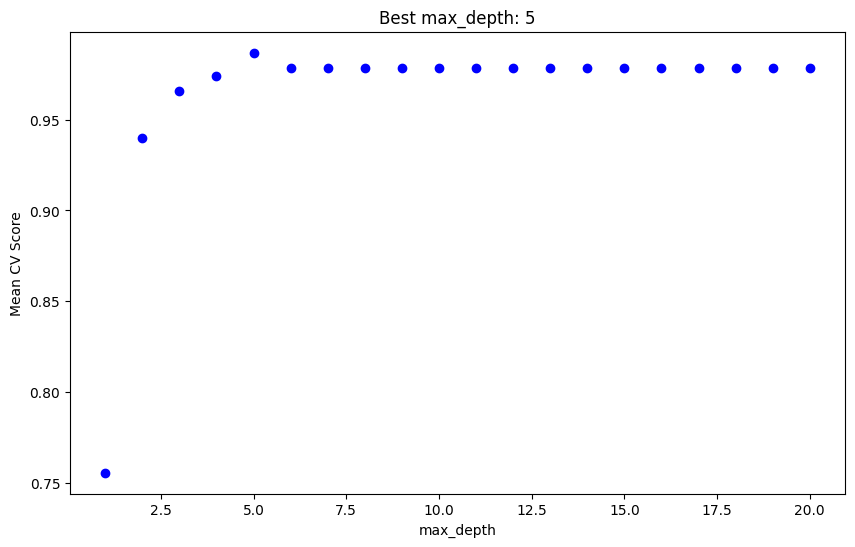

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6))

best_score = 0

for d in range(1,21):

    RF = RandomForestClassifier(max_depth = d, random_state = 2004)

    cv_score = cross_val_score(RF, X_train_RF, y_train, cv = 10).mean()  # calculates the mean cross val score for the max_depth raging between 1-20

    ax.scatter(d, cv_score, color = "blue")

    if cv_score > best_score:
        best_score = cv_score
        best_depth = d          # keeps track of the best cv score and the corresponding max_depth

ax.set(title = "Best max_depth: " + str(best_depth),
       xlabel = "max_depth",
       ylabel = "Mean CV Score")

plt.show()


A 10-fold cross validation was conducted in order to determine the best max_depth to use for the model. Max depths between 1 and 20 were tested and using the cross_val_score module it was determined that the best max_depth was 5. In the graph, we can see however that the Random Forest model is pretty stable and does not seem to have much overfitting occur regardless of the max_depth.  

Random Forests Model score is: 0.9207920792079208




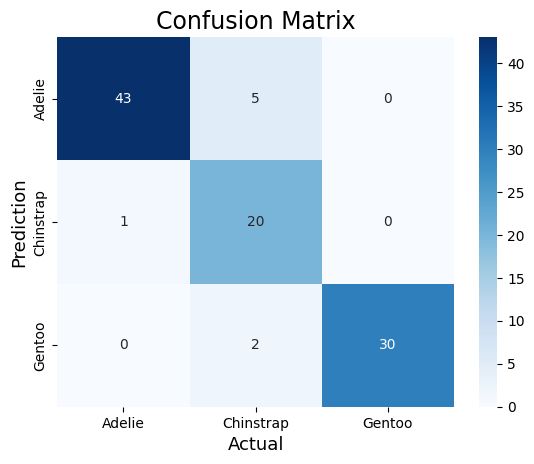

In [ ]:
RF = RandomForestClassifier(max_depth = best_depth, random_state = 2004)   # initializes the model

RF.fit(X_train_RF, y_train)   # fits the model with the training data

y_pred_RF = RF.predict(X_test_RF)

from sklearn.metrics import confusion_matrix

cm_RF = confusion_matrix(y_test, y_pred_RF)    # creates the confusion matrix

print("Random Forests Model score is: " + str(RF.score(X_test_RF, y_test)))    # prints the score of the model
print("\n")
plot_confusion_matrix(cm_RF)

The model is then created using the best max_depth that we discovered during k-fold cross-validation and then fitted with our training data. The model is then scored on the testing data and this score is 0.9207920792079208 which is a fairly high score for an ML model. This means that the model is able to predict the species correcty around 92% of the time. Then a confusion matrix is created which shows us what the computer is predicting the species to be plotted against what the actual species of that data is. When looking at this matrix, we can see that the diagonal true positives are the darkest regions with the highest amount of predictions. This is good because this means that the model is predicting Adelie when it is actually Adelie and so on. There are a few wrong predictions seen mostly when the actual species is Chinstrap. Overall, the model is fairly accurate.

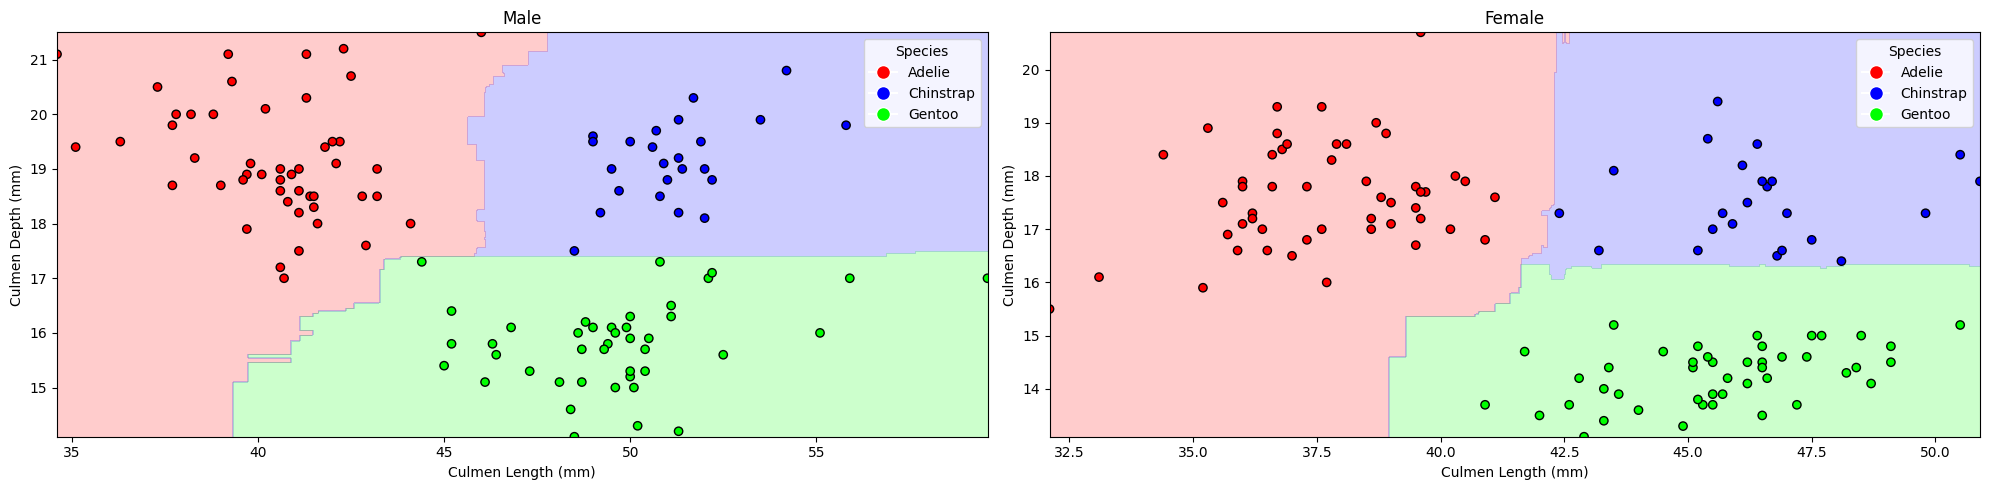

In [ ]:
y_train_dr = y_train.replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})

# Initialize knn for the decision region plot
RF.fit(X_train_RF, y_train_dr)

# Prepare the LabelEncoder for 'Sex'
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X_train_RF['Sex'])

# Plot decision boundaries for each sex
sexes = X_train_RF['Sex'].unique()
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, sex in zip(axs, sexes):
    # Subset data for the sex
    sex_data = X_train_RF[X_train_RF['Sex'] == le_sex.transform([sex])[0]]
    sex_target = y_train_dr.loc[sex_data.index]
    plot_regions_Sex(RF, sex_data, sex_target, ax, sex, le_sex)

plt.tight_layout()

The decision regions plot above shows that for both male and female penguins, the model is accurate in identifying the species based off of culmen length and depth. There does not seem to be any overfitting happening and most of the testung data lies within the region of the plot that it should

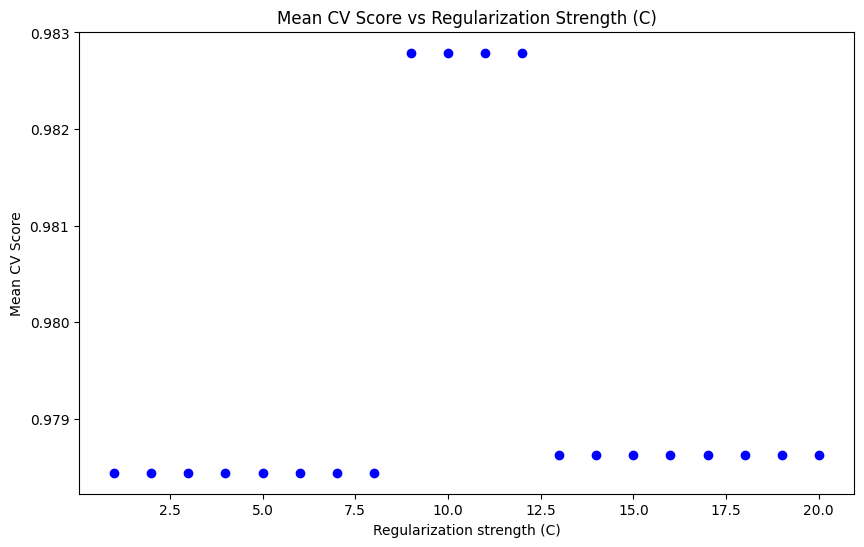

In [ ]:

X_train_MLR = X_train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']]
X_test_MLR = X_test[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']]

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
fig, ax = plt.subplots(1, figsize = (10, 6))
best_score = 0

for c in range(1,21):
  #define multinomial logistic regression model
  MLR = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = c, max_iter = 5000, random_state = 2004) #what is lbfgs?
  cv_score = cross_val_score(MLR, X_train_MLR, y_train, cv = 10).mean()
  ax.scatter(c, cv_score, color = "blue")

  if cv_score > best_score:
    best_score = cv_score
    best_C = c

  ax.set(title = "Mean CV Score vs Regularization Strength (C)",
         xlabel = "Regularization strength (C)",
         ylabel = "Mean CV Score")

plt.show()


The X variable sets (both training and testing) were modified to only include the columns of ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'] because these were determined to be the best features to use for the Multinomial Logistic Regression model during feature selection.

Multinomial Logistic Regression Model score is: 0.9306930693069307




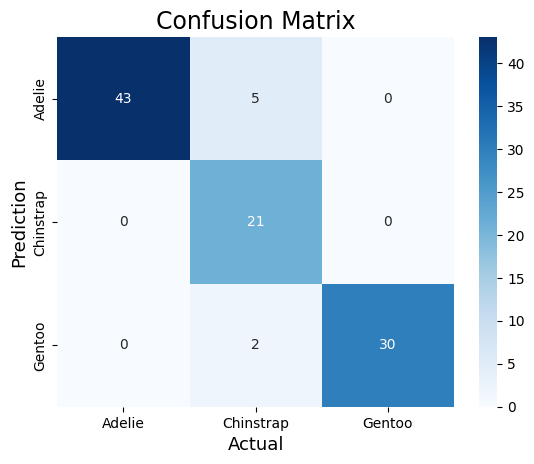

In [ ]:
MLR = LogisticRegression(C = best_C, random_state = 2004, max_iter = 5000)

MLR.fit(X_train_MLR, y_train)

y_pred_MLR = MLR.predict(X_test_MLR)

from sklearn.metrics import confusion_matrix

cm_MLR= confusion_matrix(y_test, y_pred_MLR)

print("Multinomial Logistic Regression Model score is: " + str(MLR.score(X_test_MLR, y_test)))
print("\n")
plot_confusion_matrix(cm_MLR)

A 10-fold cross validation was conducted in order to determine the best regularization strength to use for the model. Regularization strengths between 1 and 20 were tested and using the cross_val_score module it was determined that the best regularization strength was 10. In the graph, we can see however that the Multinomial Logistic Regression model is pretty stable and accurate around regularization strengths 8 to 12, and does not seem to have much overfitting occur regardless of the regularization strengths.

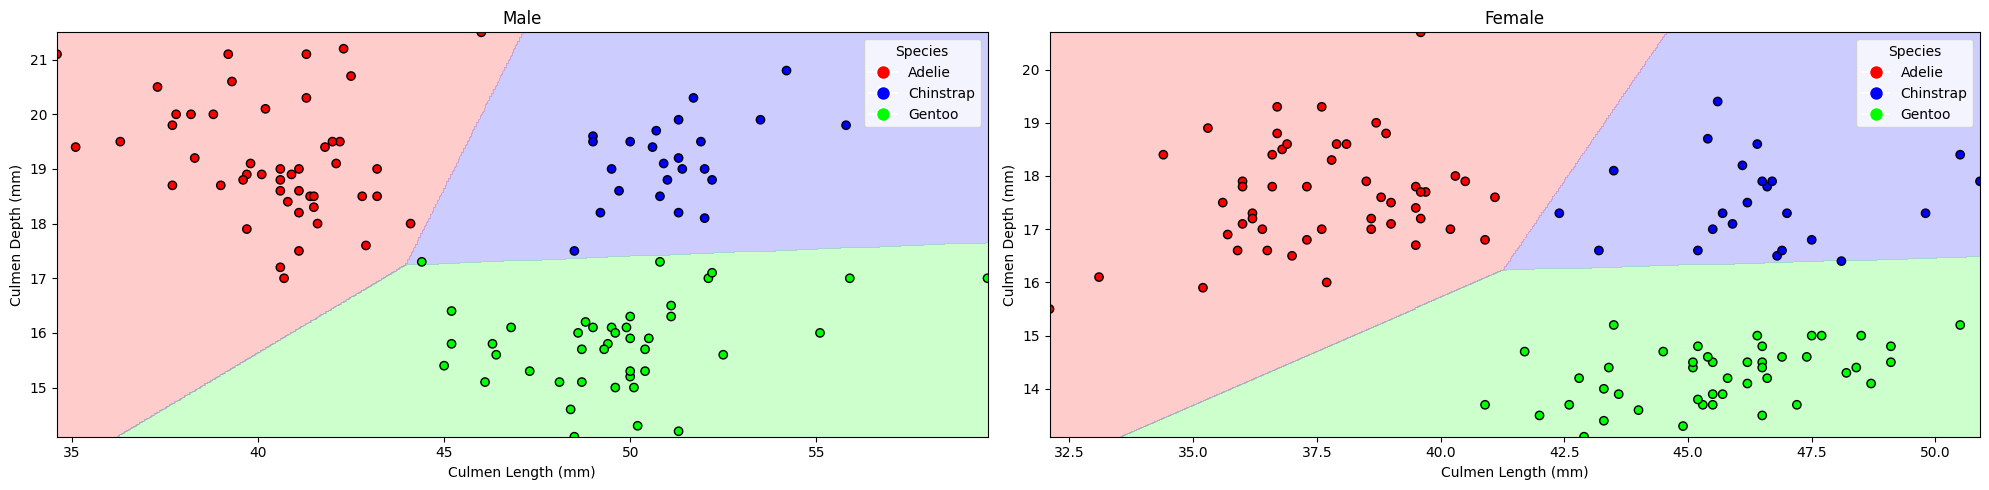

In [ ]:
y_train_dr = y_train.replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})

# Initialize knn for the decision region plot
MLR.fit(X_train_MLR, y_train_dr)

# Prepare the LabelEncoder for 'Sex'
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X_train_MLR['Sex'])

# Plot decision boundaries for each sex
sexes = X_train_MLR['Sex'].unique()
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, sex in zip(axs, sexes):
    # Subset data for the sex
    sex_data = X_train_MLR[X_train_MLR['Sex'] == le_sex.transform([sex])[0]]
    sex_target = y_train_dr.loc[sex_data.index]
    plot_regions_Sex(MLR, sex_data, sex_target, ax, sex, le_sex)

plt.tight_layout()

Best k value: 1
Test set accuracy: 0.9604
              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        48
   Chinstrap       0.90      0.90      0.90        21
      Gentoo       0.97      1.00      0.98        32

    accuracy                           0.96       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



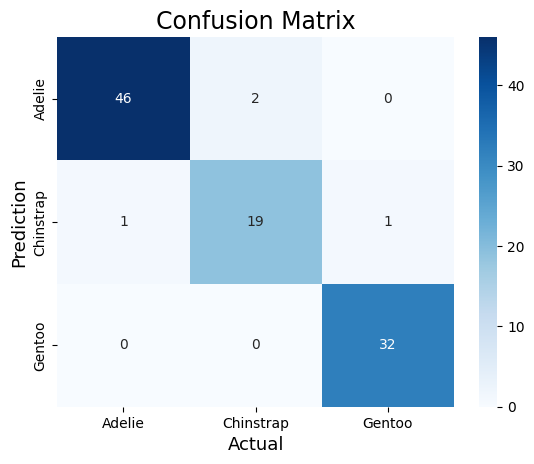

In [ ]:
## we set the X_train and X_test to the features we found to be the best.
X_train_NN = X_train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']]
X_test_NN = X_test[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']]

"""
In nearest neighbor modeling, we are using a variable k to distinguish the number of neighbors
we are considering when making a decision in the model. To find the best k value to use for our specific
model, we are using a Grid Search.
"""
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Initializing the grid search
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fitting the grid with our data.
grid.fit(X_train_NN, y_train)

# Find the best k value
best_k = grid.best_params_['n_neighbors']
print("Best k value:", best_k)

# reinitialzing the KNN with our new best k value found from the grid search.

knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the training data
knn.fit(X_train_NN, y_train)

# Predict the labels for the test set
y_pred_NN = knn.predict(X_test_NN)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_NN)
print(f"Test set accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_NN))

cm_NN = confusion_matrix(y_test, y_pred_NN)
plot_confusion_matrix(cm_NN)


Discussion:
When doing a nearest neighbor search, we need to utilize a k value which determines how many neighbors will be checked in the algorithm. A grid search was used to find the best k value for our certain data set however, a best k value of 1 was found. One downside of this is that a low k-value can lead to overfitting which can lead to a high error rate. From testing I found that as we increased the k-value there was a decrease in accuracy.
For KNN modeling, one huge downside is the impact of outliers. If there were outliers in the set, we may improve the modeling through increasing the size of the test set by having more penguins

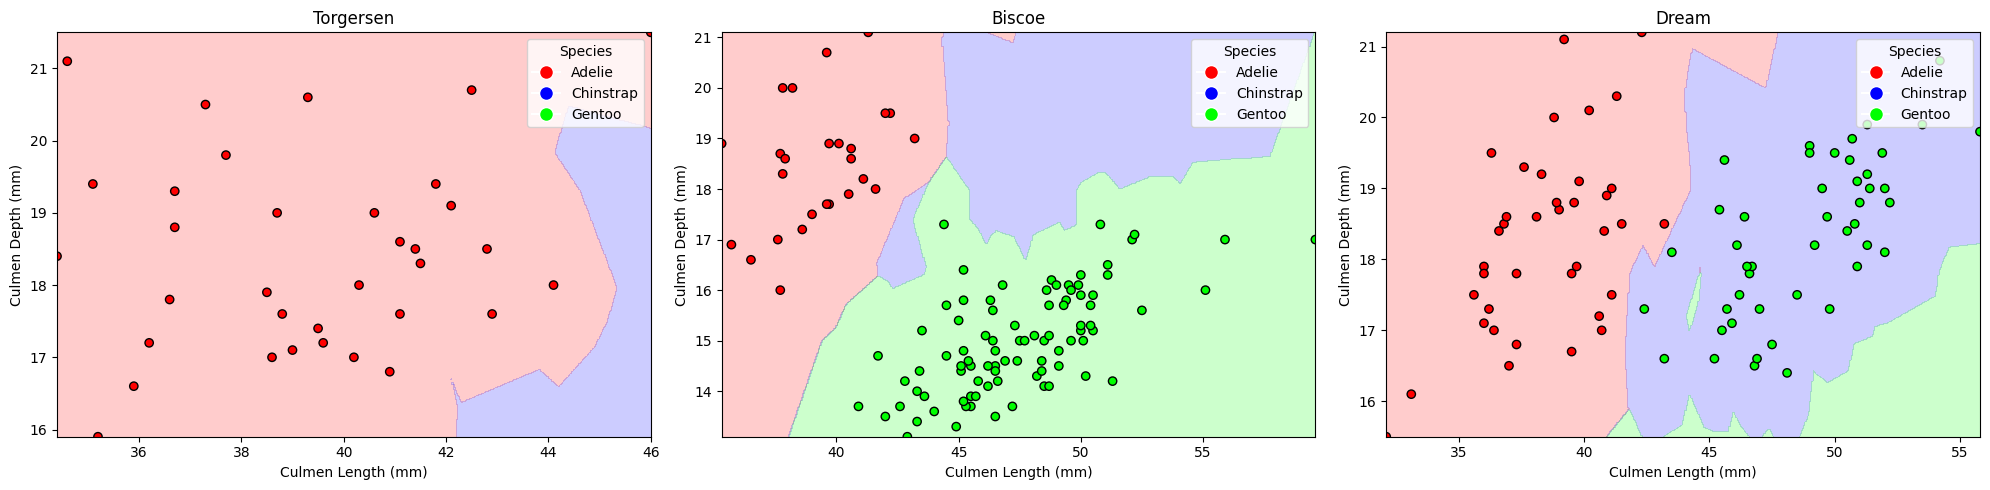

In [ ]:
y_train_dr = y_train.replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})

# Initialize knn for the decision region plot
knn.fit(X_train_NN, y_train_dr)

# Prepare the LabelEncoder for 'Island'
le_islands = preprocessing.LabelEncoder()
le_islands.fit(penguins['Island'])

# Plot decision boundaries for each island
islands = penguins['Island'].unique()
fig, axs = plt.subplots(1, len(islands), figsize=(20, 5))

for ax, island in zip(axs, islands):
    # Subset data for the island
    island_data = X_train_NN[X_train_NN['Island'] == le_islands.transform([island])[0]]
    island_target = y_train_dr.loc[island_data.index]
    plot_regions(knn, island_data, island_target, ax, island, le_islands)

plt.tight_layout()
plt.show()

From our Decision Boundary plots we see that on some islands there is a complete lack of certain species. This shows us that islands are incredibly important in terms of determining the species of a penguin with its other features

# Discussion

From our three different learning models we have found that the Nearest Neighbor Classification gives the highest accuracy score for our given data set.
**NEAREST NEIGHBOR CLASSIFICATION**
When we observe the results from the nearest neighbor model we can see that we got a test set accuracy of ~96%. compared to that of 92% from the other models.
To further improve the model one solution would be to increase the sample size of our data-- better honing all the models. For KNN Clasification in particular, we are looking at the distances between our features. Better adjusting the data of our features by either normalizing or standardizing the data would also increase the accuracy of our model.

When looking at the discrepancy of the accuracy of the models we can infer a few things from our data set. By seeing that KNN Classification was the best learning model it shows us that the feature interactions between our data is heavily important as KNN looks at the comparison and accounts for all traits when determining its distance values. Another big reason in which one model proved to be more accurate than the others may be due to the difference in qualitative feature chosen.